In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [40]:
data1=pd.read_csv("IPL2022.csv")
data1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


 # Number of matches won by each IPL team in 2022

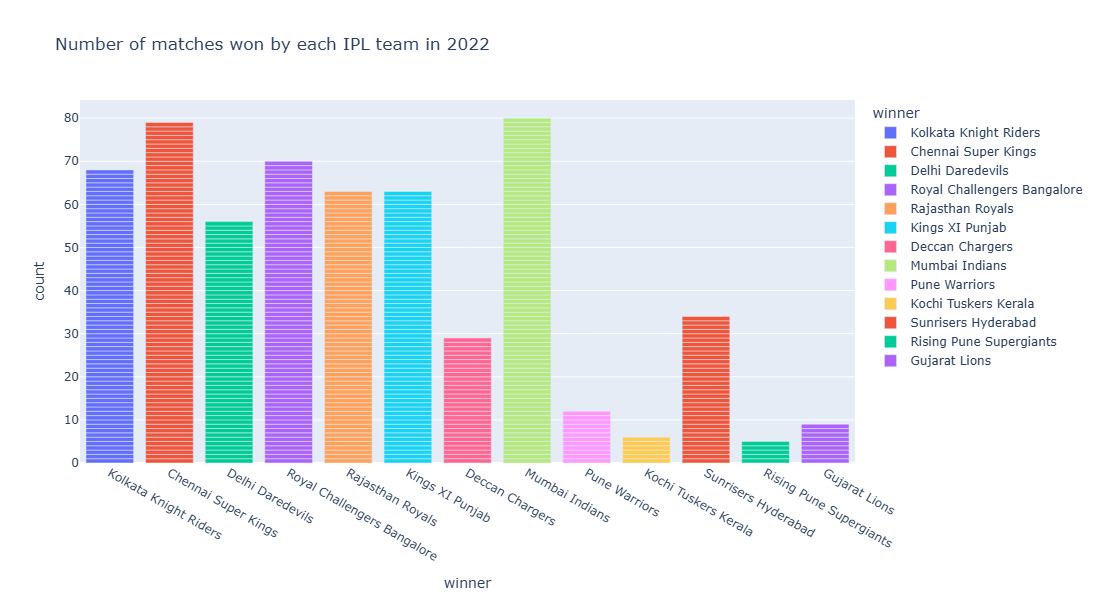

In [8]:
fig=px.bar(data1,x='winner',title = "Number of matches won by each IPL team in 2022",color= 'winner',color_continuous_scale="viridis")
fig.update_layout(height=600,width = 900)
fig.show()

# Distribution of wins based on runs and wickets

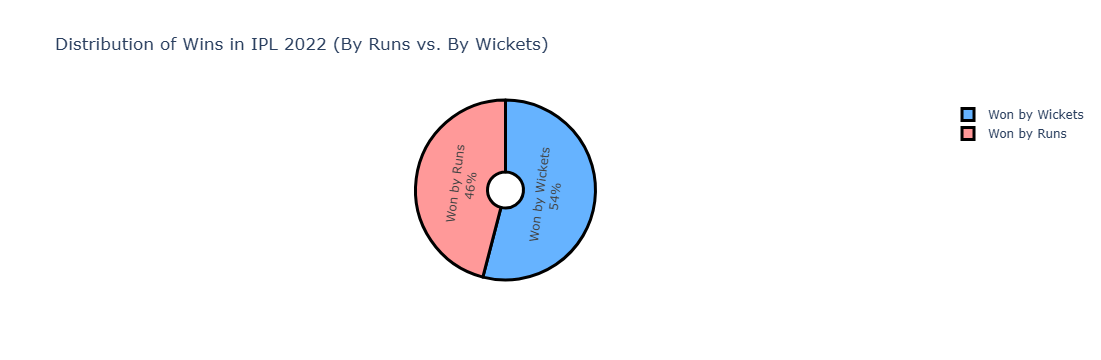

In [26]:
won_by_runs = data1[data1["win_by_runs"] > 0].shape[0]      # Teams that won by runs
won_by_wickets = data1[data1["win_by_wickets"] > 0].shape[0]   # Teams that won by wickets
labels = ["Won by Runs", "Won by Wickets"]
values = [won_by_runs, won_by_wickets]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             marker=dict(colors=["FF9999", "#66B3FF"],line =dict(color='Black',width = 3)),  # Custom Colors
                             hole=0.2,  # Donut-style chart
                             textinfo="label+percent")])  # Show labels and percentages
                             #pull=[0.1, 0])])  # Slightly separate the first slice
fig.update_layout(title = "Distribution of Wins in IPL 2022 (By Runs vs. By Wickets)")
fig.show()

# Player of the match in IPL-2022 

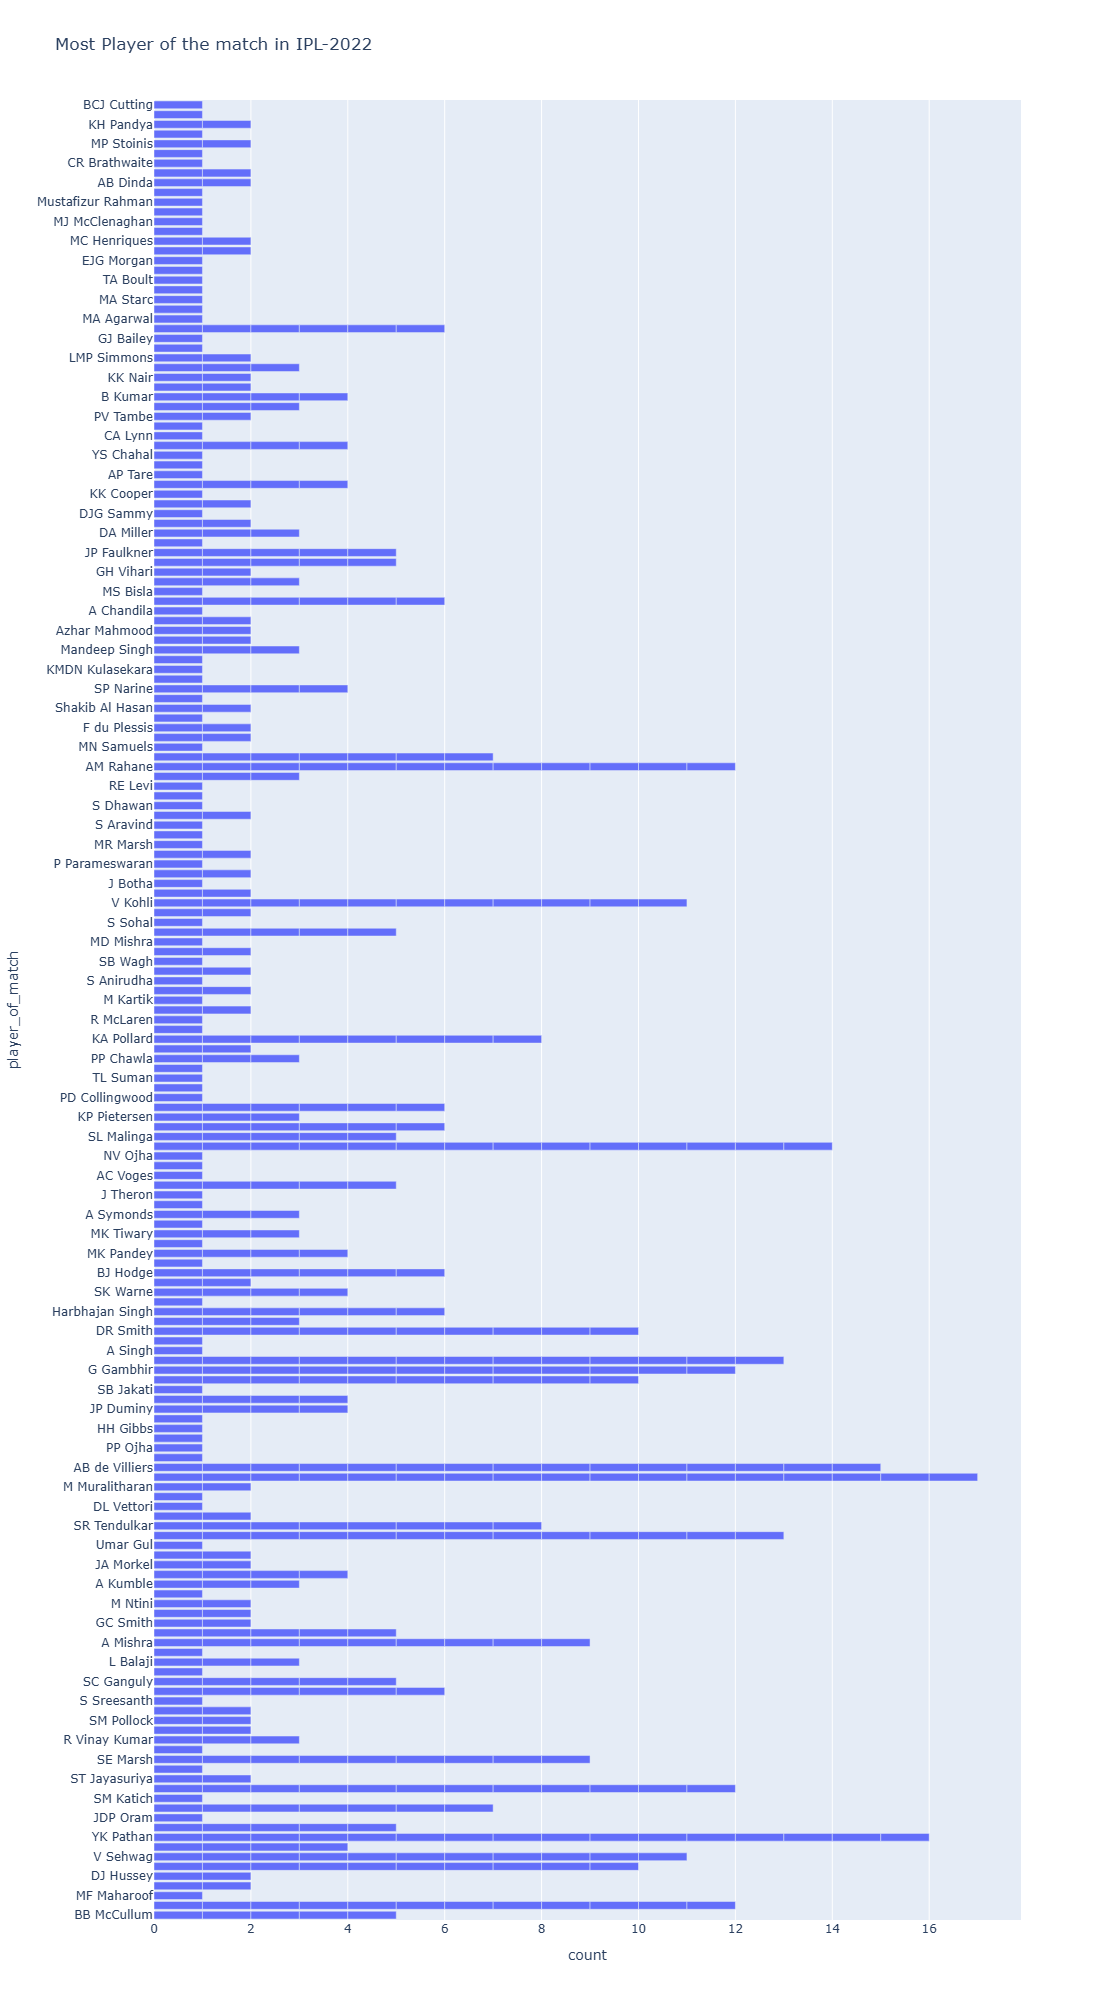

In [36]:
fig=px.bar(data1,y=data1["player_of_match"],title = "Most Player of the match in IPL-2022")
fig.update_layout(height = 2000,width=1000)
fig.show()

# To find out count of matches of teams who won both toss as well as game

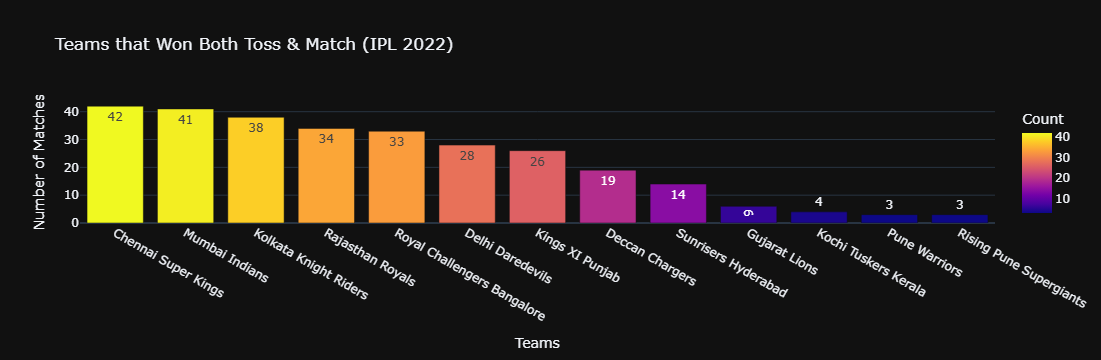

In [38]:
toss_and_game_winners=data1[data1["toss_winner"]==data1["winner"]]
# Count the number of times each team won both toss and match
team_counts = toss_and_game_winners["winner"].value_counts().reset_index()
team_counts.columns = ["Team", "Matches Won (Toss & Match)"]
fig = px.bar(team_counts, x="Team", y="Matches Won (Toss & Match)", 
             title="Teams that Won Both Toss & Match (IPL 2022)",
             labels={"Matches Won (Toss & Match)": "Count"},
             color="Matches Won (Toss & Match)",  # Color based on count
             text="Matches Won (Toss & Match)")
fig.update_layout(xaxis_title="Teams", yaxis_title="Number of Matches",
                  template="plotly_dark", showlegend=False)
fig.show()

# Finding how many times different teams won by wickets and won by runs using Stacked Bar Graph

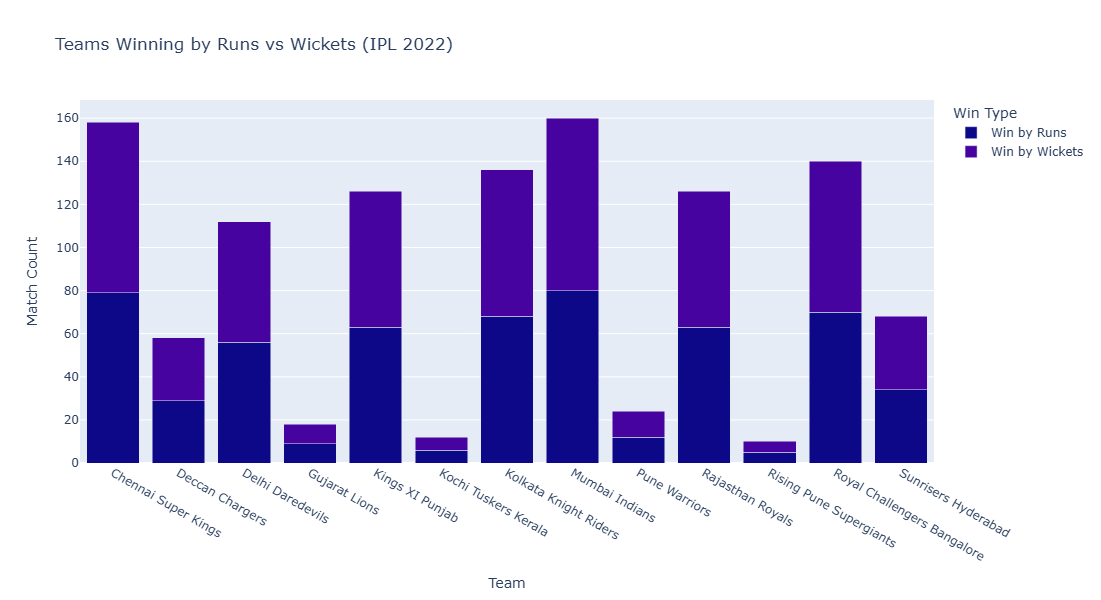

In [52]:
import plotly.colors
wins_by_runs = data1.groupby("winner")["win_by_runs"].count().reset_index()
wins_by_wickets = data1.groupby("winner")["win_by_wickets"].count().reset_index()
wins_by_runs.columns = ["Team", "Win by Runs"]
wins_by_wickets.columns = ["Team", "Win by Wickets"]
team_wins = pd.merge(wins_by_runs, wins_by_wickets, on="Team")
color_palette = plotly.colors.sequential.Plasma
fig = px.bar(team_wins, x="Team", y=["Win by Runs", "Win by Wickets"],
             title="Teams Winning by Runs vs Wickets (IPL 2022)",
             labels={"value": "Match Count", "variable": "Win Type"},
             barmode="stack",  # Stacked bar chart
             color_discrete_sequence=color_palette) 
fig.update_layout(height=600,width=900)
fig.show()